In [1]:
import numpy as np

x = np.arange(6,0,-1)
print(x)
# np.argmin() return the index of min value
np.argmin(x)

[6 5 4 3 2 1]


5

In [2]:
# swap
a, b = 1, 2
a, b = b, a
a,b

(2, 1)

In [3]:
# 插入排序
def selction_sort(x):
    # x : list of numbers needed to be sorted
    for i in range(len(x)):
        min = i + np.argmin(x[i:])
        x[i], x[min] = x[min], x[i]
    return x

# np.random.randint(low, high, size)
s = np.random.randint(10, size=5)
print(s)
print(selction_sort(s))

# s changed
print(s)
%timeit selction_sort(s)

[4 5 4 9 3]
[3 4 4 5 9]
[3 4 4 5 9]
11.1 µs ± 197 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
s = np.random.randint(10, size=5)
# np.sort 为快排
print('original:', s, 'sorted:', np.sort(s))
%timeit np.sort(s)
print(s)

# 返回排序完的索引
i = np.argsort(s)
print('sorted indexs:', i)

# s will change after s.sort(), 自己调用排序会改变顺序
# s.sort()
# print(s)

original: [4 7 1 4 3] sorted: [1 3 4 4 7]
2.03 µs ± 86 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[4 7 1 4 3]
sorted indexs: [2 4 0 3 1]


In [5]:
s[i]

array([1, 3, 4, 4, 7])

In [6]:
r = np.random.RandomState(23)
X = r.randint(0, 10, (4, 5))
X

array([[3, 6, 8, 9, 6],
       [8, 7, 9, 3, 6],
       [1, 2, 5, 5, 0],
       [5, 0, 9, 9, 3]])

In [7]:
# 对X每一列排序
np.sort(X, axis=0)

array([[1, 0, 5, 3, 0],
       [3, 2, 8, 5, 3],
       [5, 6, 9, 9, 6],
       [8, 7, 9, 9, 6]])

In [8]:
# 对X每一行排序
np.sort(X, axis=1)

array([[3, 6, 6, 8, 9],
       [3, 6, 7, 8, 9],
       [0, 1, 2, 5, 5],
       [0, 3, 5, 9, 9]])

In [9]:
x = np.array([7,3,1,2,5,9])
# 最左侧为第4小值，且左侧4个数为最小的四个数，右侧值任意序列
np.partition(x, 4)

array([5, 1, 3, 2, 7, 9])

In [10]:
# 每行最小的两个两个数在左侧
print(np.partition(X, 2, axis=1))
print(X)

[[3 6 6 9 8]
 [3 6 7 8 9]
 [0 1 2 5 5]
 [0 3 5 9 9]]
[[3 6 8 9 6]
 [8 7 9 3 6]
 [1 2 5 5 0]
 [5 0 9 9 3]]


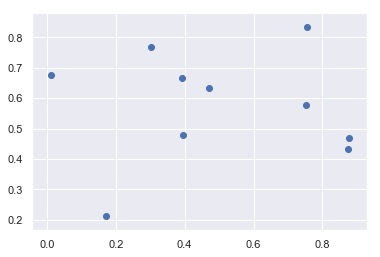

In [11]:
# rand(): [0, 1)
X = r.rand(10, 2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(X[:,0], X[:,1])

In [12]:
d = X[:, np.newaxis, :]
d

array([[[0.75262962, 0.57885898]],

       [[0.39494098, 0.47957394]],

       [[0.39094035, 0.66716199]],

       [[0.75612728, 0.83368127]],

       [[0.17218411, 0.21215342]],

       [[0.87471452, 0.4327296 ]],

       [[0.87607795, 0.47060621]],

       [[0.30242789, 0.76732241]],

       [[0.01034376, 0.67624331]],

       [[0.47168087, 0.63416532]]])

In [13]:
# np.newaxis set axis = 1
a = np.arange(6).reshape(3,2)[:, np.newaxis, :]
b = np.arange(6).reshape(3,2)[np.newaxis, :, :]
print(a, '\nshape:', a.shape, '\na[0]:\n', a[0])
print(b, '\nshape:', b.shape, '\nb[0]:\n', b[0], '\nb[0][1]:\n', b[0][1])
print(a-b, (a-b).shape)
print((a-b)**2, ((a-b)**2).shape)
# axis=-1 指最内层array两值相加
dist_sq = ((a-b)**2).sum(axis=-1)
print(dist_sq)
# np.diagonal() 查看对角线元素
dist_sq.shape, dist_sq.diagonal()

[[[0 1]]

 [[2 3]]

 [[4 5]]] 
shape: (3, 1, 2) 
a[0]:
 [[0 1]]
[[[0 1]
  [2 3]
  [4 5]]] 
shape: (1, 3, 2) 
b[0]:
 [[0 1]
 [2 3]
 [4 5]] 
b[0][1]:
 [2 3]
[[[ 0  0]
  [-2 -2]
  [-4 -4]]

 [[ 2  2]
  [ 0  0]
  [-2 -2]]

 [[ 4  4]
  [ 2  2]
  [ 0  0]]] (3, 3, 2)
[[[ 0  0]
  [ 4  4]
  [16 16]]

 [[ 4  4]
  [ 0  0]
  [ 4  4]]

 [[16 16]
  [ 4  4]
  [ 0  0]]] (3, 3, 2)
[[ 0  8 32]
 [ 8  0  8]
 [32  8  0]]


((3, 3), array([0, 0, 0]))

In [14]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:])**2, axis=-1)
# 对称矩阵
dist_sq, dist_sq.diagonal()

(array([[0.        , 0.13779868, 0.13861655, 0.06494663, 0.47138995,
         0.03625852, 0.02695815, 0.23820005, 0.56047199, 0.08199099],
        [0.13779868, 0.        , 0.03520528, 0.25584754, 0.12113436,
         0.23237704, 0.23157321, 0.09135785, 0.18659386, 0.02978751],
        [0.13861655, 0.03520528, 0.        , 0.16109017, 0.25488709,
         0.28899599, 0.27399267, 0.01786656, 0.14493623, 0.00760781],
        [0.06494663, 0.25584754, 0.16109017, 0.        , 0.72728649,
         0.17482517, 0.14621166, 0.21024663, 0.58097977, 0.12071637],
        [0.47138995, 0.12113436, 0.25488709, 0.72728649, 0.        ,
         0.54220282, 0.56226439, 0.32517604, 0.24157172, 0.26779235],
        [0.03625852, 0.23237704, 0.28899599, 0.17482517, 0.54220282,
         0.        , 0.0014365 , 0.43946433, 0.80643573, 0.20301247],
        [0.02695815, 0.23157321, 0.27399267, 0.14621166, 0.56226439,
         0.0014365 , 0.        , 0.41711489, 0.7917823 , 0.19028858],
        [0.23820005, 0.0913

In [15]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 6, 5, 3, 9, 1, 2, 7, 4, 8],
       [1, 9, 2, 7, 4, 0, 8, 6, 5, 3],
       [2, 9, 7, 1, 0, 8, 3, 4, 6, 5],
       [3, 0, 9, 6, 2, 5, 7, 1, 8, 4],
       [4, 1, 8, 2, 9, 7, 0, 5, 6, 3],
       [5, 6, 0, 3, 9, 1, 2, 7, 4, 8],
       [6, 5, 0, 3, 9, 1, 2, 7, 4, 8],
       [7, 2, 9, 1, 8, 3, 0, 4, 6, 5],
       [8, 7, 2, 1, 9, 4, 0, 3, 6, 5],
       [9, 2, 1, 7, 0, 3, 6, 5, 8, 4]])

In [16]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[6, 0, 5, 3, 9, 1, 2, 7, 8, 4],
       [1, 9, 2, 7, 4, 5, 6, 3, 8, 0],
       [2, 9, 7, 1, 0, 5, 6, 3, 8, 4],
       [3, 0, 9, 6, 2, 5, 1, 7, 8, 4],
       [4, 1, 8, 2, 9, 5, 6, 7, 3, 0],
       [6, 5, 0, 3, 9, 1, 2, 7, 8, 4],
       [6, 5, 0, 3, 9, 1, 2, 7, 8, 4],
       [7, 2, 9, 1, 8, 3, 0, 6, 5, 4],
       [8, 7, 2, 1, 9, 4, 6, 5, 3, 0],
       [2, 9, 1, 7, 0, 5, 6, 3, 8, 4]])

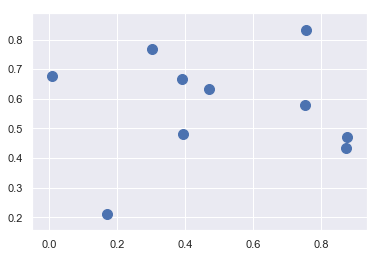

In [17]:
plt.scatter(X[:, 0], X[:, 1], s=100)

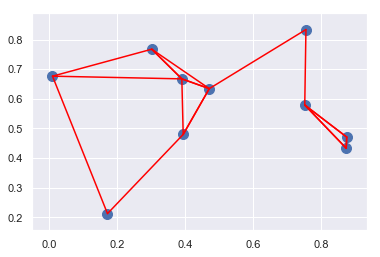

In [18]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 连接X[i]和X[j]
        # *zip实现
        plt.plot(*zip(X[i], X[j]), color='red')

向量化操作相比于对数据进行循环遍历的优势十分大，首先运算维度降低，其次前者对数据量不敏感，可以轻松处理任意维度的数据而不需要修改代码。